<a href="https://colab.research.google.com/github/delafarahita/PCVK_Ganjil_2024/blob/main/Proyek_PCVK_Berdua_Brillianta_Dela_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brilliantna Salsabila / 2241720041 / 04

# Dela Farahita Zain    / 2241720058 /07


# **Deteksi Penggunaan Masker Kesehatan pada Wajah**

# Import Folder yang Ada di Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

In [ ]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

# Menetapkan Path untuk Data Pelatihan
Menentukan lokasi penyimpanan data yang akan digunakan untuk melatih model.

In [ ]:
from pathlib import Path

x  = "/content/drive/MyDrive/Proyek_Brilli-Dela/dataset"
path = Path(x)
path.ls()

(#4) [Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/with_mask'),Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/without_mask'),Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/valid'),Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/train')]

# Memuat data untuk pelatihan
Mengatur dan memuat data pelatihan ke dalam program.

In [ ]:
from fastai.vision.all import *
import numpy as np

# Pastikan path sudah benar, menggantikan dengan direktori data yang digunakan
path = Path("/content/drive/MyDrive/Proyek_Brilli-Dela/dataset")

# Menetapkan seed untuk hasil yang konsisten
np.random.seed(40)

# Mendefinisikan blok data
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),      # Menentukan tipe data (gambar dan kategori)
    get_items=get_image_files,               # Mengambil file gambar dari folder
    splitter=RandomSplitter(valid_pct=0.2),  # Membagi data 80% pelatihan, 20% validasi
    get_y=parent_label,                      # Mendapatkan label berdasarkan nama folder induk
    item_tfms=Resize(224),                   # Mengubah ukuran gambar menjadi 224x224
    batch_tfms=aug_transforms(do_flip=True) + [Normalize.from_stats(*imagenet_stats)]  # Augmentasi dan normalisasi
)

# Memuat data dari path yang ditentukan
dataset = data_block.dataloaders(path, bs=64, num_workers=4)


#  Eksplorasi Data
Melakukan analisis awal untuk memahami struktur dan karakteristik data.

In [ ]:
pip install pillow pillow-heif


In [ ]:
from pathlib import Path
from PIL import Image
import pillow_heif

# Path ke direktori dataset
path = Path("/content/drive/MyDrive/Proyek_Brilli-Dela/dataset")

# Fungsi untuk mengonversi HEIC ke JPG
def convert_heic_to_jpg(folder_path):
    for heic_file in folder_path.rglob("*.heic"):
        try:
            # Membuka file HEIC
            heif_file = pillow_heif.read_heif(str(heic_file))
            image = Image.frombytes(
                heif_file.mode,
                heif_file.size,
                heif_file.data,
                "raw"
            )
            # Menyimpan sebagai JPG
            new_file = heic_file.with_suffix(".jpg")
            image.save(new_file, "JPEG")
            print(f"Berhasil mengonversi: {heic_file} -> {new_file}")

            # Hapus file HEIC asli
            heic_file.unlink()
        except Exception as e:
            print(f"Error mengonversi file {heic_file}: {e}")

# Jalankan fungsi konversi
convert_heic_to_jpg(path)


In [ ]:
from PIL import Image

for file in get_image_files(path):
    try:
        img = Image.open(file)
        img.verify()  # Cek apakah file bisa dibuka
    except Exception as e:
        print(f"File tidak valid: {file} - {e}")


In [ ]:
from pathlib import Path
from PIL import Image

# Path ke direktori dataset
path = Path("/content/drive/MyDrive/Proyek_Brilli-Dela/dataset")

# Fungsi untuk konversi PNG ke JPG
def convert_to_jpg(folder_path):
    for file in folder_path.rglob("*.png"):  # Cari file .png
        try:
            img = Image.open(file)
            img = img.convert("RGB")  # Pastikan gambar dalam mode RGB
            new_file = file.with_suffix(".jpg")  # Ubah ekstensi ke .jpg
            img.save(new_file, "JPEG")
            print(f"Berhasil mengonversi: {file} -> {new_file}")

            # Hapus file .png lama jika konversi berhasil
            file.unlink()
        except Exception as e:
            print(f"Error saat mengonversi {file}: {e}")

# Jalankan fungsi
convert_to_jpg(path)


In [ ]:
def is_valid_image(file):
    try:
        img = Image.open(file)
        img.verify()  # Validasi file
        return True
    except:
        return False

# Validasi semua file di folder dataset
for file in path.rglob("*.*"):
    if not is_valid_image(file):
        print(f"File tidak valid: {file}")


In [ ]:
print(dataset.items)


[Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/with_mask/IMG-20220904-WA0014.jpg'), Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/with_mask/IMG20241115132418.jpg'), Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/valid/with_mask/IMG_20241115_132453.jpg'), Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/train/with_mask/IMG-20230629-WA0016.jpg'), Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/valid/with_mask/IMG_20241115_133650.jpg'), Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/valid/with_mask/IMG_20241115_133532.jpg'), Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/train/with_mask/IMG-20221202-WA0043.jpg'), Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/train/with_mask/IMG_20240119_185312.jpg'), Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/valid/with_mask/20221015_144233.jpg'), Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/valid/with_mask/IMG20241115132518.jpg'), Path('/content/drive/MyDrive/

In [ ]:
print(len(dataset))


2


In [ ]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2),
                   get_y=parent_label,
                   item_tfms=Resize(224))
dataset = dblock.dataloaders(path)


In [ ]:
dataset = dblock.dataloaders(path, bs=4)


In [ ]:
print(path.ls())


[Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/with_mask'), Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/without_mask'), Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/valid'), Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/train')]


In [ ]:
for batch in dataset:
    print(batch)
    break  # Ini akan menghentikan loop setelah batch pertama ditampilkan


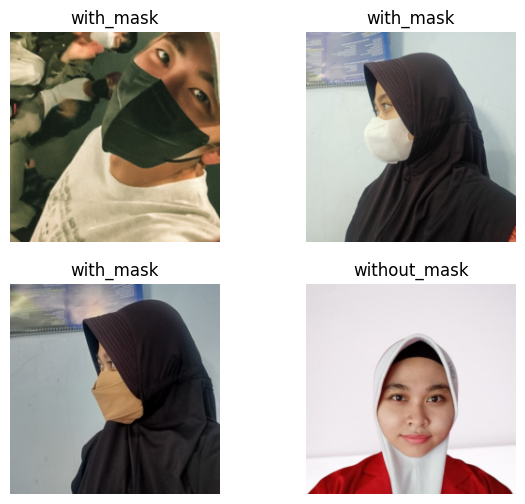

In [ ]:
# Menampilkan batch data dengan 3 baris dan ukuran gambar yang ditentukan
dataset.show_batch(max_n=9, figsize=(7,6))


# Mengecek jumlah data di pelatihan dan validasi

In [ ]:
# # Menampilkan panjang data pelatihan dan validasi
# print(f'Jumlah data pelatihan: {len(data.train)}')
# print(f'Jumlah data validasi: {len(data.valid)}')
# Menampilkan panjang data pelatihan dan validasi
print(f'Jumlah data pelatihan: {len(dataset.train_ds)}')
print(f'Jumlah data validasi: {len(dataset.valid_ds)}')



Jumlah data pelatihan: 187
Jumlah data validasi: 46


# Menampilkan Kelas yang Ada dalam Data
Menampilkan label atau kategori kelas yang ada dalam data pelatihan.

In [ ]:
# Menampilkan kelas-kelas yang ada di dataset
print(dataset.vocab)

# Menampilkan jumlah kelas
print(len(dataset.vocab))


['with_mask', 'without_mask']
2


In [ ]:
# Memuat data dari path yang ditentukan
data = data_block.dataloaders(path, bs=64, num_workers=4)

# Menampilkan output seperti ImageDataBunch
print(f"ImageDataBunch;\n")
print(f"Train: LabelList ({len(data.train.items)} items)")
print(f"x: ImageList")
# Menampilkan beberapa gambar (3 channel, ukuran 224x224)
print(f"Image (3, 224, 224)," * 5)
print(f"y: CategoryList")
# Menampilkan beberapa label dari data pelatihan
print(','.join([str(lbl) for lbl in data.train.dataset.items[:5]]))
print(f"Path: {path};\n")

print(f"Valid: LabelList ({len(data.valid.items)} items)")
print(f"x: ImageList")
# Menampilkan beberapa gambar (3 channel, ukuran 224x224)
print(f"Image (3, 224, 224)," * 5)
print(f"y: CategoryList")
# Menampilkan beberapa label dari data validasi
print(','.join([str(lbl) for lbl in data.valid.dataset.items[:5]]))
print(f"Path: {path};\n")

print(f"Test: None")

ImageDataBunch;

Train: LabelList (187 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),
y: CategoryList
/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/with_mask/ff98d16bef3b1ffd048f5d343b745ce6.jpg,/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/valid/with_mask/IMG20210618101244.jpg,/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/with_mask/IMG20241115132418.jpg,/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/train/without_mask/ttn-image-2024-04-28-120109734.jpg,/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/with_mask/IMG-20221003-WA0006.jpg
Path: /content/drive/MyDrive/Proyek_Brilli-Dela/dataset;

Valid: LabelList (46 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),
y: CategoryList
/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/valid/with_mask/IMG_20241115_132844.jpg,/content/drive/MyDrive/Proyek_Brilli-Dela/dataset/valid/with_ma

# Membuat Model
Membangun arsitektur model untuk deteksi masker wajah.

In [ ]:
learn = vision_learner(data, models.resnet50, metrics=[accuracy], model_dir=Path('../kaggle/working'), path=Path("."))


# Menemukan Learning Rate (LR)
Mengidentifikasi learning rate yang optimal untuk melatih model.

In [ ]:
from fastai.vision.all import *

# Path ke folder utama yang berisi gambar
path = untar_data(URLs.PETS)/'images'

# Membuat DataLoader dengan split otomatis
dls = ImageDataLoaders.from_name_re(
    path,  # Folder utama
    get_image_files(path),  # Mendapatkan semua file gambar
    pat=r'(.+)_\d+',  # Regex untuk label
    valid_pct=0.2,  # Proporsi validasi
    seed=42,  # Agar pembagian konsisten
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224)
)

# Periksa DataLoader
print(len(dls.train), len(dls.valid))


92 24


In [ ]:
print(path.ls())
items = get_image_files(path)
print(len(items))  # Jumlah file dalam dataset
splits = RandomSplitter(valid_pct=0.2)(items)
print(len(splits[0]), len(splits[1]))  # Jumlah data training dan validasi


[Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_89.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_166.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_64.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_165.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_38.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_171.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_63.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_44.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_3.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_93.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_197.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_116.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/pug_50.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_133.jpg'), Path('/root/.fastai/data/oxford-

In [ ]:
from fastai.vision.all import *

# Path ke folder dataset utama
path = Path('/content/drive/MyDrive/Proyek_Brilli-Dela/dataset')

# Buat DataLoader dengan valid_pct
dls = ImageDataLoaders.from_folder(
    path,                  # Folder utama dataset
    valid_pct=0.2,         # 20% untuk validasi
    seed=42,               # Agar split konsisten
    item_tfms=Resize(224), # Resize gambar ke 224x224
    batch_tfms=aug_transforms(size=224)  # Augmentasi
)

# Periksa jumlah data train dan validasi
print(len(dls.train), len(dls.valid))


2 1


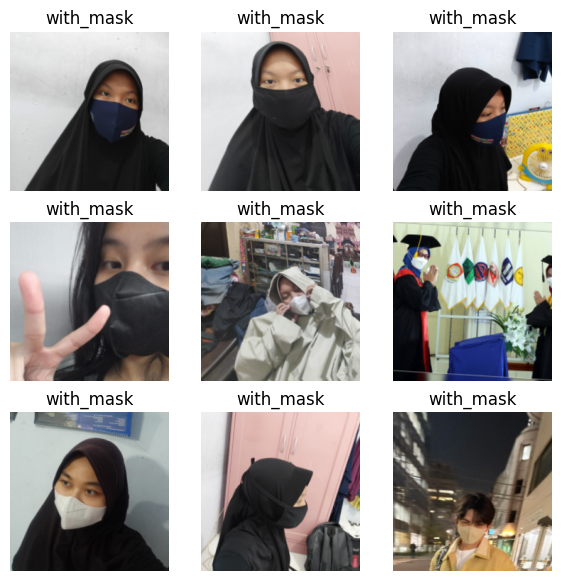

In [ ]:
dls.show_batch(max_n=9, figsize=(7, 7))


In [ ]:
# Menggunakan ImageDataLoaders untuk kemudahan
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='valid',
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224)
)

# Periksa DataLoader
print(len(dls.train), len(dls.valid))


1 2


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

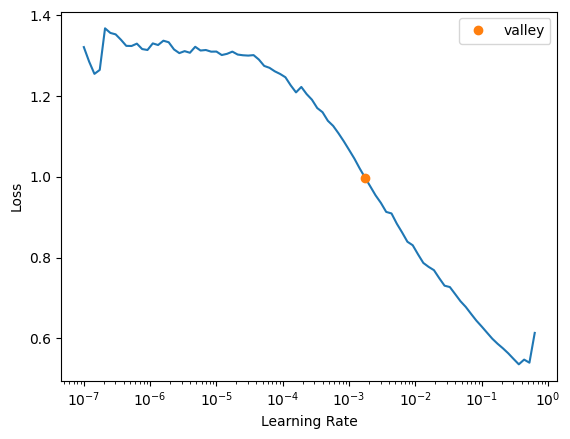

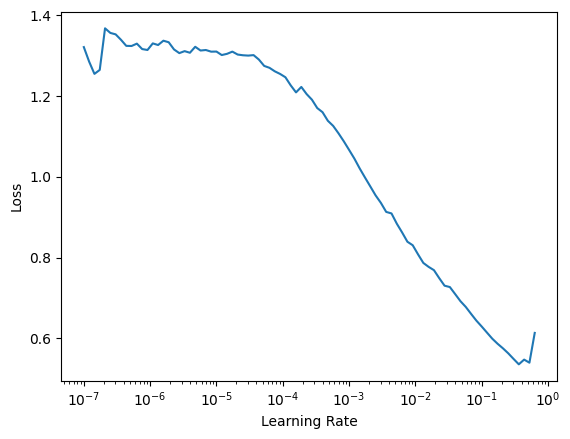

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

learn.lr_find()
learn.recorder.plot_lr_find()

# Melatih Model
Melakukan proses pelatihan model menggunakan data yang telah dimuat.

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,1.448649,67.298950,0.239130,00:51
1,2.592461,7.094901,0.565217,00:44
2,1.932714,2.959751,0.695652,00:42
3,1.575932,1.392875,0.826087,00:44


# Tuning Hyper Parameter
Menyesuaikan parameter model untuk meningkatkan kinerja.

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.221254,0.786008,0.934783,00:45
1,0.231571,0.652233,0.956522,00:46
2,0.173319,0.539372,0.956522,00:43
3,0.168435,0.435481,0.978261,00:45
4,0.180025,0.407962,0.956522,00:45
5,0.222267,0.420534,0.978261,00:43
6,0.205813,0.483765,0.978261,00:44
7,0.176326,0.537298,0.956522,00:47
8,0.165697,0.555620,0.956522,00:41
9,0.153860,0.567069,0.956522,00:44


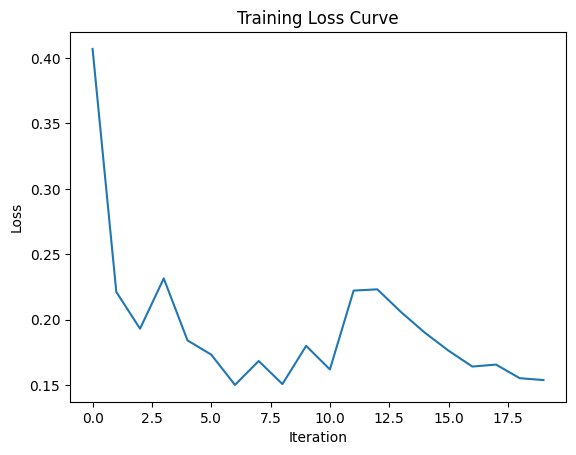

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation losses
plt.plot(learn.recorder.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


# Menginterpretasikan Hasil
Mengevaluasi performa model berdasarkan hasil yang diperoleh.

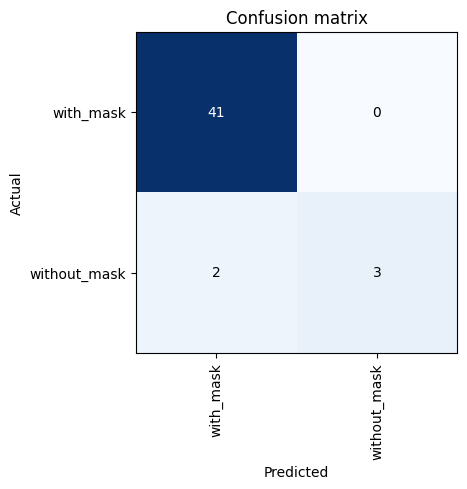

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

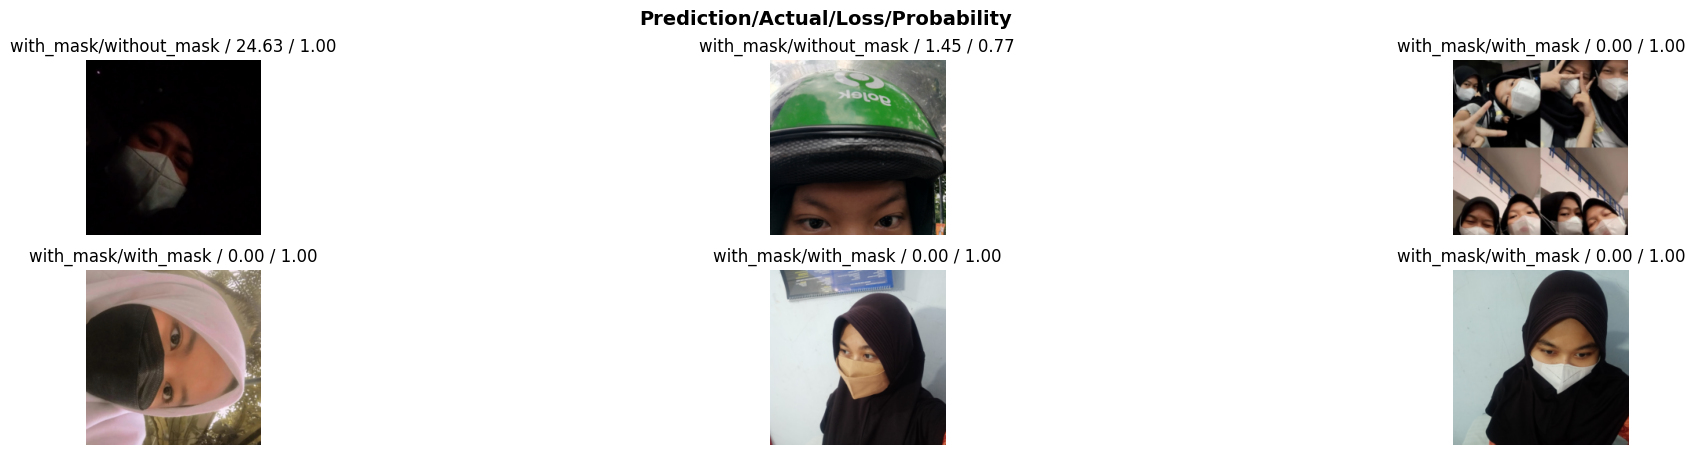

In [ ]:
interp.plot_top_losses(6,figsize = (25,5))

# Menyimpan dan Memuat Model
Menyimpan model yang sudah dilatih dan memuatnya kembali untuk penggunaan selanjutnya.

In [ ]:
# Mengekspor model ke file 'export.pkl' di direktori '/kaggle/working'
learn.export("/kaggle/working/export.pkl")

# Mengatur direktori untuk menyimpan model
learn.model_dir = "/kaggle/working"

# Menyimpan model dengan nama 'stage-1' tanpa menggunakan 'return_path'
learn.save("stage-1")


Path('/kaggle/working/stage-1.pth')